In [1]:
import librosa
import soundfile as sf
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(X,sample_rate, mfcc, chroma, mel):
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [7]:
#Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#Emotions to observe
observed_emotions=['neutral','calm', 'happy', 'fearful','sad','disgust']

def load_data(test_size=0.25):
    x,y=[],[]
    for file in glob.glob(r"F:\Stuti project\Ravdess small sample datase\\Actor_*\\*.wav"):
        try:
            
            file_name = os.path.basename(file)
            emotion = emotions[file_name.split("-")[2]]
            if emotion not in observed_emotions:
                continue
            X, sample_rate = librosa.load(file)
            feature = extract_feature(X,sample_rate, mfcc=True, chroma=True, mel=True)
            x.append(feature)
            y.append(emotion)
        except ValueError:
            continue
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

x_train,x_test,y_train,y_test = load_data(test_size=0.25)

In [8]:
print(x_train,x_test,y_train,y_test)

[[-6.62813380e+02  4.42473787e+01 -6.59610600e+00 ...  1.04503129e-05
   3.53108804e-06  4.39556540e-07]
 [-7.34384982e+02  7.09815768e+01  3.78953028e+00 ...  3.73609183e-06
   1.51491111e-06  8.16403442e-08]
 [-6.49656892e+02  4.91581463e+01 -1.14046779e+01 ...  8.65323529e-05
   5.08118874e-05  6.04150350e-06]
 ...
 [-5.28245826e+02  2.86368370e+01 -1.01716938e+01 ...  1.83485915e-03
   7.34492395e-04  5.21544395e-05]
 [-6.35417706e+02  6.45556997e+01  6.15741501e+00 ...  1.17191504e-05
   7.75338330e-06  1.19735196e-06]
 [-5.83966997e+02  5.11323208e+01  1.19368026e+00 ...  2.28348497e-04
   9.47889633e-05  8.37829004e-06]] [[-6.20537478e+02  4.45008323e+01 -1.32434265e+01 ...  2.51761139e-04
   9.51638042e-05  7.01660847e-06]
 [-4.51610674e+02  5.04363464e+00 -2.99543238e+01 ...  3.06098480e-03
   9.09623625e-04  6.68725391e-05]
 [-6.54947304e+02  4.66062196e+01 -9.20302447e+00 ...  1.40282288e-05
   1.07308888e-05  1.02167948e-06]
 ...
 [-5.17699867e+02  2.57567750e+01 -9.5309681

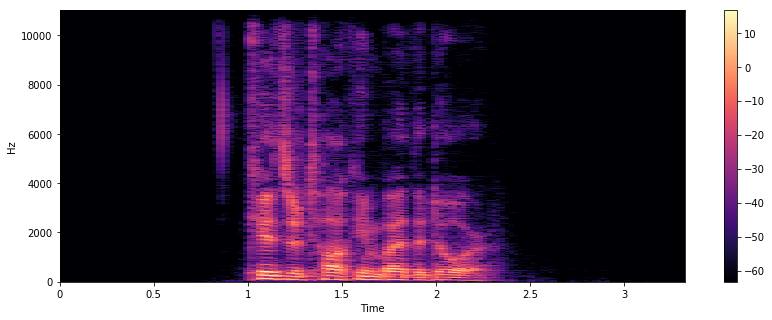

In [11]:
import librosa.display
X, sr = librosa.load(r'F:\Stuti project\Ravdess small sample datase\Actor_01/03-01-01-01-01-01-01.wav')
# print(y,y.shape)
# print(sr)
# # D = np.abs(librosa.stft(y))
# # # print(D,D.shape)
# name = r'F:\Stuti project\Ravdess small sample datase\Actor_01/03-01-01-01-01-01-01.wav'
# X, sr = sf.read(name,dtype="float32")
# # sr = sf.samplerate
# print(X,sr)


X = librosa.stft(X)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

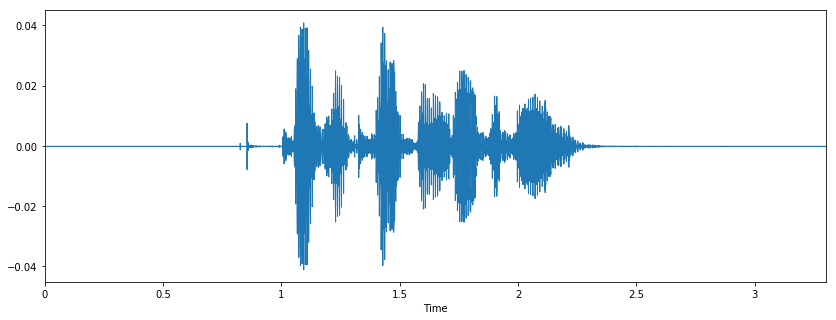

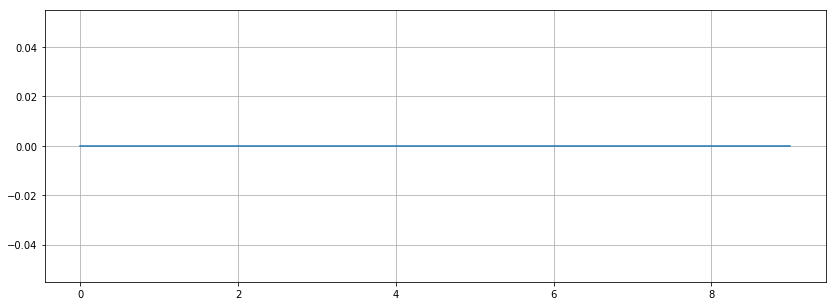

In [17]:
##########  Feature Extraction   ############

### Zero crossing rate ###

audio_path = r'F:\Stuti project\Ravdess small sample datase\Actor_01/03-01-01-01-01-01-01.wav'
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)


### Zooming in ###
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

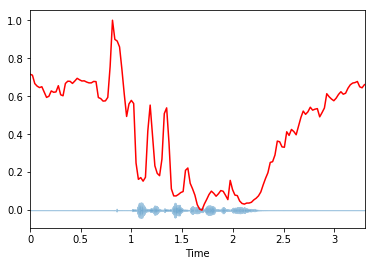

In [18]:
#########   Spectral Centroid   #########
 

#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

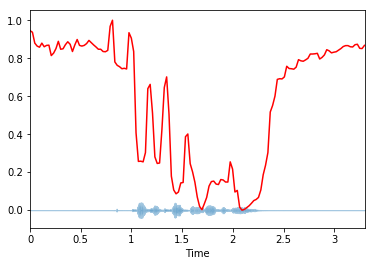

In [19]:
######  Spectral Rolloff   #######

spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 143)


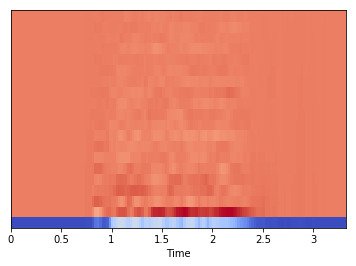

In [20]:
#######     MFCC — Mel-Frequency Cepstral Coefficients     #########


mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')